# Advanced Regression 
## Prediction price vary with the data variables

Problem Statment:

A US-based housing company named Surprise Housing has decided to enter the Australian market.The company is looking at prospective properties to buy to enter the market in Australian.

Need to build a model using the test data collected from the sale of houses in Australia and to build a model to predict 
the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns

### Data Understanding, Preparation and EDA

In [765]:
#import the required libraries 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import os
import time
import warnings


In [766]:
#Loading the dataset
shousing = pd.read_csv('train.csv')


In [767]:
## Checking the head of the dataset
shousing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [768]:
#Checking the Number of rows and columns in the dataset
shousing.shape

(1460, 81)

In [769]:
#Checking the over all data and there datatypes ,find if any null vales  etc in the datset 
shousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [770]:
#Insights of data
shousing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [771]:
# removing data variables which has more null value percentage ~50% and Id 

varlist =  ['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu']
for element in varlist:

    shousing.drop(element, inplace=True, axis=1)


In [772]:
shousing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [773]:
round(shousing.isnull().sum()/len(shousing.index)*100,2).sort_values(ascending=True)

MSSubClass        0.00
TotalBsmtSF       0.00
SaleCondition     0.00
HeatingQC         0.00
CentralAir        0.00
                 ...  
GarageQual        5.55
GarageCond        5.55
GarageYrBlt       5.55
GarageType        5.55
LotFrontage      17.74
Length: 75, dtype: float64

In [774]:
shousing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [775]:
# Find the Frequency of unique columns in the dataset
shousing.describe(exclude=np.number).transpose().sort_values(ascending = False,by = 'freq')


,count,unique,top,freq
Utilities,1460,2,AllPub,1459
Street,1460,2,Pave,1454
Condition2,1460,8,Norm,1445
RoofMatl,1460,8,CompShg,1434
Heating,1460,6,GasA,1428
LandSlope,1460,3,Gtl,1382
CentralAir,1460,2,Y,1365
Functional,1460,7,Typ,1360
PavedDrive,1460,3,Y,1340
Electrical,1459,5,SBrkr,1334


In [776]:
shousing.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [777]:
shousing.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [778]:
# removing columns which has same value for most of the data
shousing.drop(['Utilities','Street','Condition2','RoofMatl','Heating'], axis=1, inplace=True)

In [779]:
shousing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [780]:
#Categorical Column

print(shousing.select_dtypes(include='object').columns)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [781]:
# Numerical Value
print(shousing.select_dtypes(exclude='object').columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [782]:
# Find the null value %

def perMissingValue(df):
    df_null=pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=['Missing /Null %'])
    df_null.index.name='Variables'
    # variables which have null values
    print(df_null[df_null['Missing /Null %']>0])
    return df_null[df_null['Missing /Null %']>0]
df_null=perMissingValue(shousing)


              Missing /Null %
Variables                    
LotFrontage             17.74
GarageCond               5.55
GarageType               5.55
GarageYrBlt              5.55
GarageFinish             5.55
GarageQual               5.55
BsmtFinType2             2.60
BsmtExposure             2.60
BsmtFinType1             2.53
BsmtCond                 2.53
BsmtQual                 2.53
MasVnrType               0.55
MasVnrArea               0.55
Electrical               0.07


In [783]:
# counting % null values
df_null=perMissingValue(shousing)

              Missing /Null %
Variables                    
LotFrontage             17.74
GarageCond               5.55
GarageType               5.55
GarageYrBlt              5.55
GarageFinish             5.55
GarageQual               5.55
BsmtFinType2             2.60
BsmtExposure             2.60
BsmtFinType1             2.53
BsmtCond                 2.53
BsmtQual                 2.53
MasVnrType               0.55
MasVnrArea               0.55
Electrical               0.07


In [784]:
for column in df_null.index:
    print(column +':')
    print(shousing[column].describe())

LotFrontage:
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
GarageCond:
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
GarageType:
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
GarageYrBlt:
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
GarageFinish:
count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
GarageQual:
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
BsmtFinType2:
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
BsmtExposure:
count     1422
uniqu

In [785]:
shousing['LotFrontage'].median()
shousing['GarageYrBlt'].median()
shousing['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [786]:
#remove null values
shousing['LotFrontage']=shousing['LotFrontage'].fillna(shousing['LotFrontage'].median())
shousing['GarageYrBlt']=shousing['GarageYrBlt'].fillna(shousing['GarageYrBlt'].median())

In [787]:
for column in ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']:
    shousing[column]=shousing[column].fillna(shousing[column].mode()[0])


In [788]:
#Checking missiong values
df_null=perMissingValue(shousing)

            Missing /Null %
Variables                  
MasVnrArea             0.55


In [789]:
shousing[shousing.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [790]:
data_num = shousing.select_dtypes(exclude='object')
data_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [791]:
data_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MoSold', 'YrSold'], axis=1, inplace = True)

In [792]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

In [793]:
# Correlation analysis
corre =data_num.corr()

In [794]:
corre

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.304522,0.116685,0.179459,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,...,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771
LotArea,0.304522,1.000000,0.014228,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
YearBuilt,0.116685,0.014228,1.000000,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,...,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897
MasVnrArea,0.179459,0.104160,0.315707,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.214367,0.214103,0.249503,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.042463,0.111170,-0.049107,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.124098,-0.002618,0.149040,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.363472,0.260833,0.391452,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.413773,0.299475,0.281986,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.072388,0.050986,0.010308,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


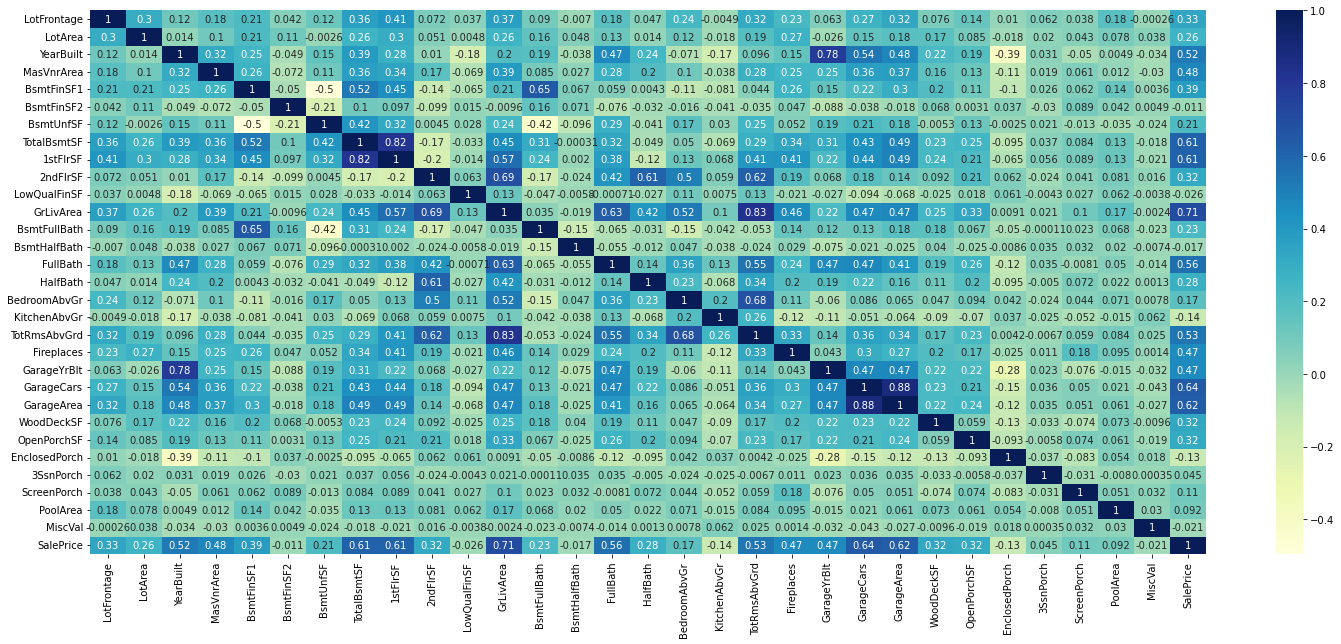

In [795]:
# heatmap
plt.figure(figsize=(25,10))
sb.heatmap(corre, cmap="YlGnBu", annot=True)
plt.show()
# Sales price is highly correlated with GrLivArea,TotalBsmtSF, 1stFlrSF,GarageArea and GarageCars
# Sales price Negatevly corellated with KitchenAbvGrd and EnclosedPorch
# High correlation between variables
# 1. GarageArea and GarageCars
# 2. TotalBsmtSF and 1stFlrSF


In [796]:
Numerical= shousing.select_dtypes(exclude='object')

print(list(Numerical.columns.values))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [797]:
Numerical_columns=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

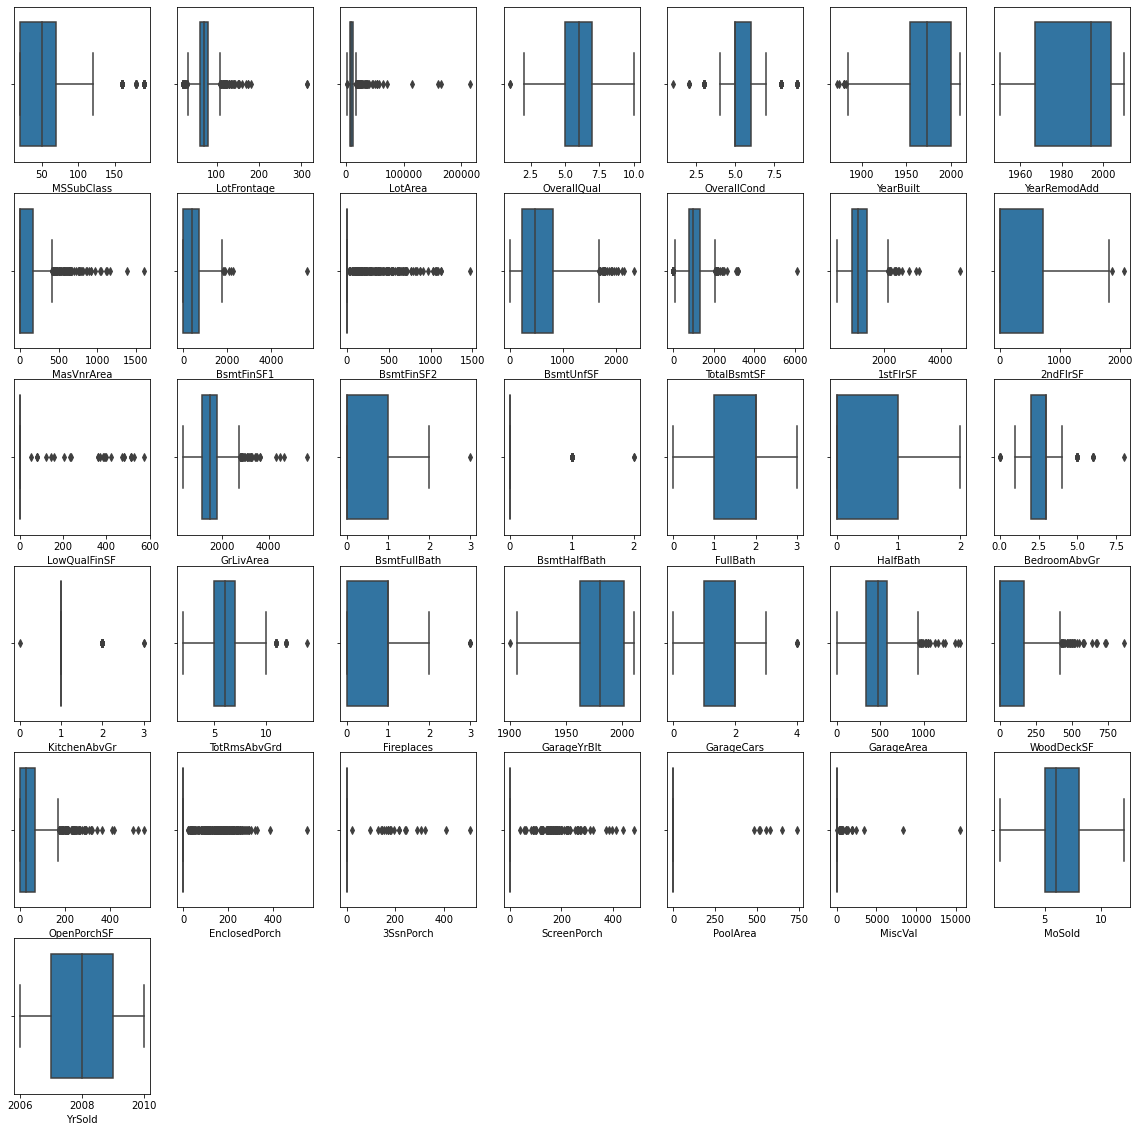

In [798]:
plt.figure(figsize = (20,20) )
for i in enumerate(Numerical_columns):
    plt.subplot(6,7,i[0]+1)
    sb.boxplot(x = i[1], data= shousing)

In [799]:
for i in Numerical_columns:
    Q1=shousing[i].quantile(0.25)
    Q3=shousing[i].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3 + 1.5 * IQR
    lower_bound=Q3 - 1.5 * IQR
    shousing[i]=shousing[i].apply(lambda x: x if x <= upper_bound else upper_bound)
    shousing[i]=shousing[i].apply(lambda x: x if x >= lower_bound else lower_bound)
       


In [800]:
df_null=perMissingValue(shousing)

Empty DataFrame
Columns: [Missing /Null %]
Index: []


In [801]:
shousing[['MSSubClass', 'OverallQual', 'OverallCond']] = shousing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [802]:
shousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   object 
 13  OverallCond    1460 non-null   object 
 14  YearBuilt      1460 non-null   float64
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [803]:
# Dividing train and test data 
from sklearn.model_selection import train_test_split

y=shousing.pop('SalePrice')
X=shousing

In [804]:
data_categ = X.select_dtypes(include = ['object'])
data_categ.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60.0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20.0,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60.0,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70.0,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60.0,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [805]:
data_dummy = pd.get_dummies(data_categ, drop_first=True)
data_dummy.head()

,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [806]:
X = X.drop(list(data_categ.columns), axis =1)

In [807]:
X = pd.concat([X, data_dummy], axis = 1)

In [808]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [809]:
y = pd.Series(scale(y))

In [810]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [811]:
X_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.008635,0.022306,-0.004806,-0.006309,0.019467,0.004396,0.0,0.008176,0.001105,0.017763,...,-0.041856,-0.008325,-0.004659,-0.023747,0.017257,0.022537,-0.036794,0.025394,0.010773,-0.008452
std,1.003751,1.004132,1.010019,1.005196,1.006585,0.990510,0.0,1.011131,1.001334,0.994482,...,0.535702,0.926953,0.993439,0.691114,0.981409,1.195693,0.773565,1.101374,0.991387,0.987851
min,-1.330503,-1.350017,-1.594593,-1.689368,-0.673150,-1.015994,0.0,-1.306365,-1.425981,-1.485625,...,-0.058621,-0.058621,-0.301962,-0.045376,-2.562180,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
25%,-0.696353,-0.713996,-0.764017,-0.914112,-0.673150,-1.015994,0.0,-0.789637,-0.741997,-0.755290,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
50%,-0.095580,-0.085586,-0.046701,0.442586,-0.673150,-0.115449,0.0,-0.187175,-0.198633,-0.177442,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
75%,0.571947,0.566743,1.048150,0.927122,0.578413,0.655787,0.0,0.565903,0.604127,0.648853,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
max,2.474397,2.422308,1.387931,1.217843,2.364270,3.095629,0.0,2.599213,2.690210,2.779144,...,17.058722,17.058722,3.311678,22.037846,0.390293,19.078784,10.984838,8.485281,0.467651,3.268027


## Lasso Regression 

In [812]:
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [813]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 135 to 860
Columns: 230 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(230)
memory usage: 1.8 MB


In [814]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5

lasso = Lasso()


model_LR = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_LR.fit(X_train,y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [815]:
# Result cross validation
cv_results = pd.DataFrame(model_LR.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127802,0.007001,0.004126,0.006357,0.0001,{'alpha': 0.0001},0.836525,0.629525,0.858813,0.835042,...,0.797430,0.084608,4,0.916920,0.947695,0.913596,0.916532,0.912733,0.921495,0.013200
1,0.037180,0.002026,0.002257,0.002170,0.001,{'alpha': 0.001},0.852676,0.644630,0.869442,0.843748,...,0.815686,0.086065,3,0.912471,0.945157,0.911424,0.913648,0.909900,0.918520,0.013375
2,0.025021,0.005352,0.002006,0.001233,0.01,{'alpha': 0.01},0.855244,0.687266,0.887149,0.857976,...,0.835525,0.075505,1,0.891768,0.927934,0.891677,0.894102,0.890949,0.899286,0.014363
3,0.010648,0.002795,0.003037,0.002504,0.05,{'alpha': 0.05},0.813615,0.717125,0.848252,0.838593,...,0.815887,0.051836,2,0.839424,0.871653,0.831832,0.840017,0.838487,0.844283,0.013997
4,0.006556,0.002422,0.002431,0.003418,0.1,{'alpha': 0.1},0.752022,0.695810,0.792900,0.791878,...,0.772096,0.045072,5,0.784472,0.814833,0.778793,0.788357,0.785044,0.790300,0.012646
5,0.008390,0.002709,0.003408,0.002263,0.2,{'alpha': 0.2},0.645598,0.586401,0.676185,0.688047,...,0.664184,0.046411,6,0.666234,0.691634,0.661347,0.676072,0.666302,0.672318,0.010778
6,0.007378,0.002919,0.002906,0.002737,0.3,{'alpha': 0.3},0.538658,0.506297,0.559529,0.589918,...,0.562144,0.038428,7,0.554639,0.586885,0.550669,0.572110,0.559293,0.564719,0.013224
7,0.006994,0.000715,0.003118,0.002386,0.4,{'alpha': 0.4},0.400521,0.388809,0.419023,0.464045,...,0.429728,0.034593,8,0.414603,0.447825,0.417089,0.446427,0.432236,0.431636,0.014021
8,0.007129,0.003335,0.002951,0.003644,0.5,{'alpha': 0.5},0.238861,0.247460,0.263525,0.313484,...,0.276658,0.033719,9,0.252586,0.290524,0.264196,0.299193,0.288936,0.279087,0.017641
9,0.009024,0.002270,0.001447,0.001225,0.6,{'alpha': 0.6},0.074895,0.107346,0.086415,0.133329,...,0.106627,0.023368,10,0.086751,0.131285,0.088749,0.125859,0.115805,0.109690,0.018601


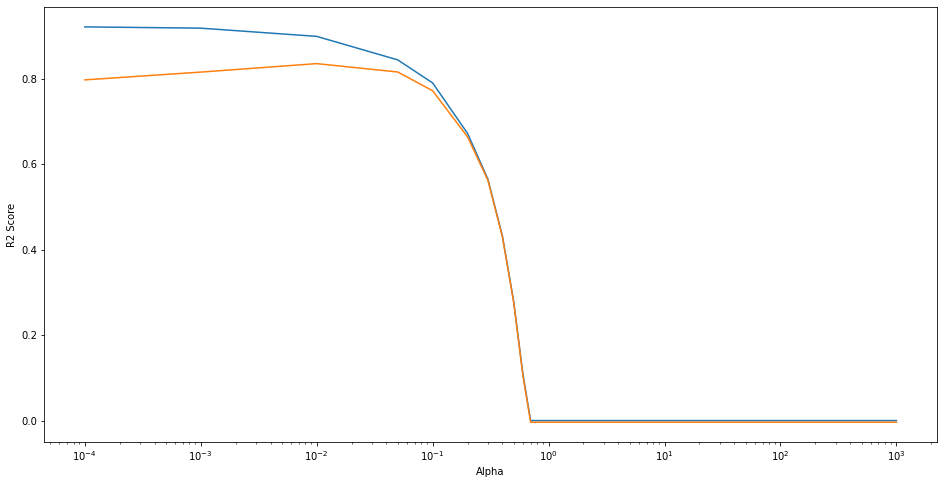

In [816]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [817]:
model_LR.best_params_

{'alpha': 0.01}

In [818]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
#building the model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [819]:
# calculating R2,RSS and RMSE for LAsso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.8921505210020079
0.8823574719464304
105.18422357490584
57.01209323984152
0.10302078704692051
0.13016459643799433


Text(0.5, 0, 'Errors')

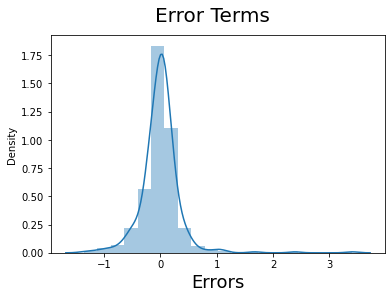

In [820]:
fig = plt.figure()
sb.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

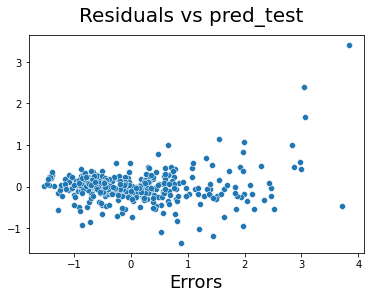

In [821]:
#histrogram for error
fig = plt.figure()
sb.scatterplot(y_test_pred,(y_test - y_test_pred))
fig.suptitle('Residuals vs pred_test', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

### Ridge Regression

In [822]:
#Ridge Regression
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model = Ridge()

model_RR = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_RR.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [823]:
#Result
cv_result_r = pd.DataFrame(model_RR.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009067,0.002388,0.003167,0.000436,0.0001,{'alpha': 0.0001},0.757038,0.873099,0.845273,0.834240,...,0.913997,0.913844,0.916869,0.925137,0.915477,0.929038,0.915343,0.912724,0.917086,0.005251
1,0.007272,0.003116,0.004290,0.004251,0.0010,{'alpha': 0.001},0.757067,0.873101,0.845274,0.834258,...,0.913997,0.913844,0.916869,0.925137,0.915477,0.929038,0.915343,0.912724,0.917086,0.005251
2,0.006767,0.007841,0.002948,0.005896,0.0100,{'alpha': 0.01},0.757359,0.873122,0.845287,0.834438,...,0.913997,0.913844,0.916869,0.925137,0.915477,0.929038,0.915343,0.912724,0.917086,0.005251
3,0.007139,0.006414,0.001962,0.002594,0.0500,{'alpha': 0.05},0.758636,0.873212,0.845344,0.835214,...,0.913997,0.913843,0.916868,0.925137,0.915476,0.929038,0.915343,0.912724,0.917085,0.005251
4,0.006426,0.003133,0.003588,0.003921,0.1000,{'alpha': 0.1},0.760181,0.873319,0.845416,0.836133,...,0.913995,0.913840,0.916865,0.925136,0.915474,0.929035,0.915343,0.912722,0.917084,0.005251
5,0.006599,0.002748,0.003850,0.003356,0.2000,{'alpha': 0.2},0.763117,0.873520,0.845558,0.837821,...,0.913989,0.913830,0.916856,0.925132,0.915466,0.929028,0.915341,0.912716,0.917077,0.005251
6,0.008206,0.003471,0.002998,0.002724,0.3000,{'alpha': 0.3},0.765862,0.873704,0.845699,0.839342,...,0.913980,0.913815,0.916843,0.925125,0.915455,0.929016,0.915339,0.912708,0.917068,0.005251
7,0.008077,0.001181,0.002600,0.001606,0.4000,{'alpha': 0.4},0.768437,0.873877,0.845840,0.840725,...,0.913969,0.913797,0.916826,0.925117,0.915440,0.929001,0.915335,0.912697,0.917056,0.005251
8,0.008284,0.002291,0.002196,0.001356,0.5000,{'alpha': 0.5},0.770856,0.874040,0.845979,0.841991,...,0.913955,0.913776,0.916805,0.925107,0.915422,0.928983,0.915331,0.912683,0.917041,0.005251
9,0.007660,0.002780,0.002901,0.001956,0.6000,{'alpha': 0.6},0.773133,0.874195,0.846118,0.843156,...,0.913940,0.913754,0.916782,0.925096,0.915403,0.928963,0.915327,0.912668,0.917025,0.005251


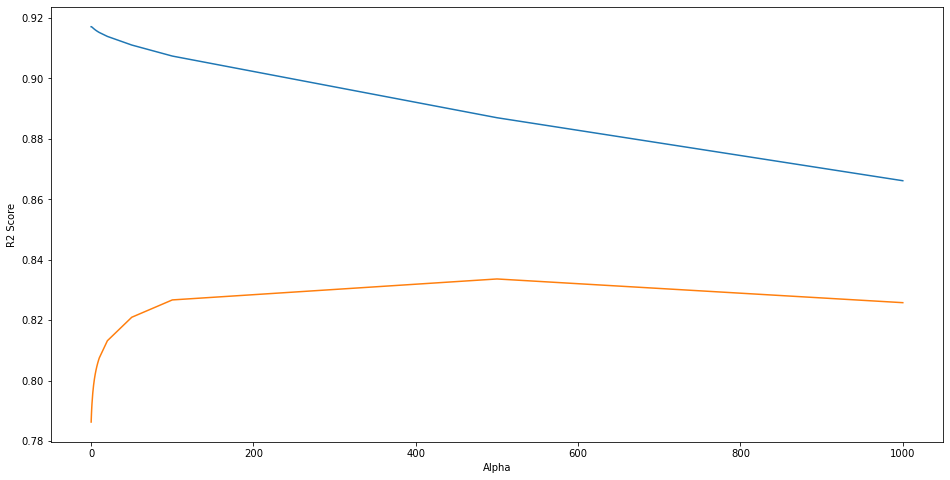

In [824]:
# r2 Score vs Alpha
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')

plt.ylabel('R2 Score')
plt.show()

In [825]:
model_RR.best_params_

{'alpha': 500}

In [826]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.12087365e-02  4.44015821e-02  2.88501414e-02  3.58224552e-02
  1.94419093e-02  6.07097714e-02  0.00000000e+00  1.78957172e-03
  7.47228699e-02  7.33096657e-02  5.54454208e-02  0.00000000e+00
  8.78736641e-02  2.09706579e-02  0.00000000e+00  4.43536426e-02
  2.74838390e-02  7.23769232e-03  0.00000000e+00  4.87951755e-02
  5.08713470e-02  1.36838164e-02  5.23762290e-02  4.13959459e-02
  2.07446393e-02  1.77499398e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.92220958e-03
  2.21197159e-03 -1.23090112e-02  7.55191877e-03  3.63203853e-03
  5.89037772e-03  1.77104557e-02  9.84151232e-03  1.04368147e-02
 -6.66187340e-03 -4.11707433e-03 -2.47805192e-02 -1.33631995e-02
 -2.52589588e-02  1.54900589e-02  1.88625582e-03  6.57987723e-03
 -8.94904454e-03  2.09073712e-02 -1.57546183e-02 -5.29558386e-03
  3.33645087e-02  1.58214256e-03  1.36198194e-02  2.73872505e-02
 -1.31658764e-02 -8.35973534e-03  4.01171272e-03  6.32678442e-03
  1.33693206e-02  6.33200

In [827]:
#R2
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

0.8863154349968834


In [828]:
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.867012273902115


In [829]:
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

110.87510865515031


In [830]:
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

64.4487054595991


In [831]:
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

0.10859462160151842


In [832]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.14714316314976963


In [833]:
y_residual = y_test - y_pred_test

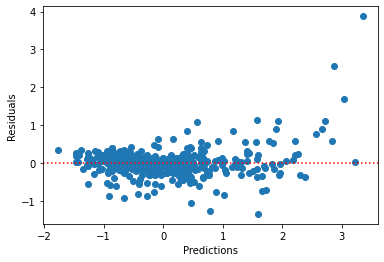

In [834]:
plt.scatter(y_pred_test,y_residual)
plt.axhline(y=0, color = 'r', linestyle = ':')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

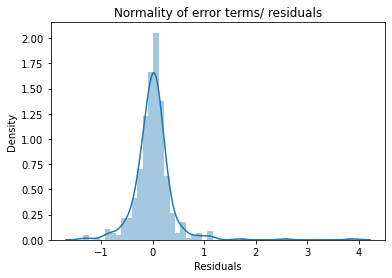

In [835]:
#Error distributon 
p = sb.distplot(y_residual, kde =True)
p = plt.title("Normality of error terms/ residuals")
plt.xlabel('Residuals')
plt.show()

###  For Assignment Quations 

In [836]:

alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.40897224e-02  4.29306403e-02  2.35213243e-02  3.25379923e-02
  2.34937447e-02  5.22072063e-02  0.00000000e+00  4.74432544e-03
  6.53568814e-02  6.53259760e-02  4.29419377e-02  0.00000000e+00
  7.67486118e-02  2.11309252e-02  0.00000000e+00  3.97040475e-02
  2.49061830e-02  1.02159462e-02  0.00000000e+00  4.80916511e-02
  4.93695885e-02  1.50123787e-02  4.95050967e-02  4.39305594e-02
  2.21448838e-02  1.91710259e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.11603157e-03
  1.93086207e-03 -1.23078562e-02  5.82646013e-03  2.29645881e-03
  4.57056982e-03  1.76618831e-02  9.31047354e-03  9.37529072e-03
 -5.37523403e-03 -3.42033599e-03 -1.97641721e-02 -8.77095319e-03
 -2.08872413e-02  1.02735456e-02 -7.40269630e-05  8.65222966e-03
 -1.14219788e-02  1.75252375e-02 -1.07711625e-02 -8.94217043e-03
  2.52565948e-02  1.35760647e-03  3.74637069e-03  2.26024196e-02
 -1.02444351e-02 -4.84731143e-03  1.27410065e-03  7.03782443e-03
  9.75501970e-03  1.49655

In [837]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.867513568580041
0.8532867224750691


In [838]:
lasso = Lasso(alpha=0.02)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [839]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

0.8755290442646767
0.876783670038258


In [840]:
# model comparison
model = pd.DataFrame(index = X_train.columns)
model['log(Ridge)'] = ridge.coef_
model['Ridge'] = np.exp(ridge.coef_)
model['log(Lasso)'] = lasso.coef_
model['Lasso'] = np.exp(lasso.coef_)

In [841]:
print(model['Ridge'].sort_values(ascending = False)[:15])

GrLivArea               1.079771
OverallQual_9.0         1.070290
TotalBsmtSF             1.067540
1stFlrSF                1.067507
OverallQual_10.0        1.066456
BsmtFinSF1              1.053594
GarageCars              1.050751
Fireplaces              1.050609
Neighborhood_NoRidge    1.050105
TotRmsAbvGrd            1.049267
Neighborhood_NridgHt    1.045282
GarageArea              1.044910
Neighborhood_StoneBr    1.044605
2ndFlrSF                1.043877
LotArea                 1.043865
Name: Ridge, dtype: float64


In [842]:
model['Lasso'].sort_values(ascending = False)[:15]

GrLivArea               1.355650
OverallQual_9.0         1.152126
OverallQual_10.0        1.137057
OverallQual_8.0         1.099787
BsmtFinSF1              1.097188
TotalBsmtSF             1.095021
GarageCars              1.091374
YearBuilt               1.066194
Neighborhood_NoRidge    1.060292
YearRemodAdd            1.060092
Neighborhood_NridgHt    1.053925
Fireplaces              1.051804
Neighborhood_StoneBr    1.051611
LotArea                 1.047005
BsmtExposure_Gd         1.042853
Name: Lasso, dtype: float64

In [843]:
X_train = X_train.drop(['GrLivArea', 'OverallQual_9.0', 'OverallQual_10.0', 'OverallQual_8.0', 'BsmtFinSF1'], axis=1)

X_test = X_test.drop(['GrLivArea', 'OverallQual_9.0', 'OverallQual_10.0', 'OverallQual_8.0', 'BsmtFinSF1'], axis=1)


In [844]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                    8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = 5, 
                       return_train_score = True, verbose = 1, n_jobs = -1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [845]:
lasso_cv.best_params_

{'alpha': 0.01}

In [846]:
lasso = Lasso(alpha = 0.01)

# Fit the model on training data
lasso.fit(X_train, y_train)

# Model predictions
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

In [847]:
model = pd.DataFrame(index = X_train.columns)
model['log(Lasso)'] = lasso.coef_
model['Lasso'] = np.exp(lasso.coef_)

In [848]:
model['Lasso'].sort_values(ascending = False)[:5]

2ndFlrSF                1.303245
1stFlrSF                1.218628
TotalBsmtSF             1.205612
Neighborhood_NridgHt    1.100284
Neighborhood_NoRidge    1.092562
Name: Lasso, dtype: float64